Изработилa: Зорица Здравковска, 101/2019

# <center>Проектна задача по Машинско учење</center>
## <center>Machine Predictive Maintenance Classification</center>

Целта на проектната задача е откривање на аномалии во индустриски процес и нивна класификација.

## Содржина

0. [Вчитување на потребни библиотеки](#bib)
1. [Опис на проблемот кој се решава](#opis)
    - [Податочно множество](#pod)
    - [Визуелизација на податоците](#viz)
    - [Опис на користените метрики](#met)
2. [Користени пристапи од машинско учење за решавање на проблемот](#pristapi)
    - [Knn](#prist1)
    - [Logistic regression](#prist2)
    - [SVM](#prist3)
    - [Random Forest](#prist4)
    - [Decision Tree](#prist5)
3. [Решавање на проблемот](#res)
     - [Y='Target'](#res)
        - [Knn](#res1)
        - [Logistic Regression](#res2)
        - [SVM](#res3)
        - [Random Forest](#res4)
        - [Decision Tree](#res5)
     - [Y='Failure type'](#res)
        - [Knn](#res1)
        - [Logistic Regression](#res2)
        - [SVM](#res3)
        - [Random Forest](#res4)
        - [Decision Tree](#res5)
4. [Споредба на резултатите](#spor)
5. [Пост-оптимизирачка анализа](#postop)
6. [Заклучок](#zakl)
7. [Користена литература и ресурси](#resources)

## 0. Вчитување на потребни библиотеки <a id='bib'></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.metrics import mean_squared_error as mse
import seaborn as sns
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from matplotlib import pyplot as plt
sns.set()
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn import metrics,tree
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score,RocCurveDisplay,accuracy_score,f1_score
from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import mode
from sklearn.tree import DecisionTreeClassifier
import imblearn
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from numpy import mean

## 1. Опис на проблемот кој се решава <a id='opis'></a>

Проблемот се состои од барање на аномалии во индустиски процес и нивна класификација. 

Дадени се податоци за параметрите во процесот:

UDI-универзален идентификтор од 1 до 10000;

Product ID- се состои од буква L,M,H (означуваат low(50% од сите продукти), medium(30%) и high(20%) и се однесуваат на варијансата на квалитет на продуктите и сериски број
специфичен за варијансата; 

Type- содржи само L,M или H; 

Air temperature [K]- температура на воздухот во келвини нормализирана со стандардна девијација од 2 келвини околу вредноста 300К;

Process temperature [K]- температура на процесот во келвини со стандардна девијација од 1 келвин околу 308К;

Rotational speed [rpm]- ротациона брзина претставена со ротации во минута и шум со нормална распределба;

Torque [Nm]- вртежен момент во Њутн метар со нормална дистрибуција околу 40Nm;

Tool wear [min]- ја претставува искористеноста на алатот/машините (абење) што би можело постепено да доведе до дефект, се пресметува врз основа на варијансата на квалитет и тоа дали имало некој проблем со машината во текот на процесот, претставено е во минути.

Претходно наведените параметри се влезни податоци кои спаѓаат во влезниот вектор х. 

Излезни податоци се Target(0 доколку нема проблем/аномалија и 1 доколку има) и Failure Type(No Failure ако нема проблем, а доколку има типот на проблем/аномалија кој се јавил).
Има неколку типови на аномалии од кои најчести се: Power Failure, Tool Wear Failure, Overstrain Failure и поретко доколку неможе да се идентификува проблемот Random Failures.

Значењето на овој проблем е големо, бидејќи ненадејни дефекти во индустрија можат да направат многу штета и губиток. Во некои случаеви не може веднаш да се идентификува причината за дефектот и мора да се стопира процесот се додека не се реши проблемот. Во големи фабрики тоа би значело голем губиток на пари.

Мотивацијата за избор на овој проблем е тоа што со добар алгоритам на машинско учење можно е однапред да се направи претпоставка за некој дефект според сегашните параметри и историја на претходни дефекти/аномалии. Со ова би се заштедило време за наоѓање на дефект, па дури може и целосно да се спречи доаѓање до проблем ако навремено се изврши замена на некој дел или се изврши потребна проверка.

### 1.1. Податочно множество <a id='pod'></a>

Податочното множество го вчитуваме и понатаму го процесираме.

In [2]:
dataset = pd.read_csv('predictive_maintenance.csv') # вчитување на фајл
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  
count            10000.000000  10000.000000     10000.000000  10000.000000  
mean              1538.776100     39.986910       107.951000      0.033900  
std                179.284096      9.968934        63.654147      0.180981  
min               1168.000000      3.800000         0.000000      0.000000  
25%               1423.000000     33.200000        53.000000      0.000000  
50%               1503.000000     40.100000       108.000000      0.000000  
75%               1612.000000     46.800000       162.000000      0.000000  
max               2886.000000     76.600000       253.000000      1.000000

In [3]:
dataset['Target'].value_counts(normalize=True)*100 #процент на аномалии

0    96.61
1     3.39
Name: Target, dtype: float64

In [4]:
dataset.isna().sum() #проверка за податоци кои недостасуваат

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [5]:
dataset = pd.concat([dataset, 
                  pd.get_dummies(dataset['Type'], prefix='Type', drop_first=True)], axis=1)
dataset.drop(columns='Type', inplace=True)
dataset

UDI Product ID  Air temperature [K]  Process temperature [K]  \
0         1     M14860                298.1                    308.6   
1         2     L47181                298.2                    308.7   
2         3     L47182                298.1                    308.5   
3         4     L47183                298.2                    308.6   
4         5     L47184                298.2                    308.7   
...     ...        ...                  ...                      ...   
9995   9996     M24855                298.8                    308.4   
9996   9997     H39410                298.9                    308.4   
9997   9998     M24857                299.0                    308.6   
9998   9999     H39412                299.0                    308.7   
9999  10000     M24859                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  Type_L  Type_M  
0      No Failure       0       1  
1      No Failure       1       0  
2      No Failure       1       0  
3      No Failure       1       0  
4      No Failure       1       0  
...           ...     ...     ...  
9995   No Failure       0       1  
9996   No Failure       0       0  
9997   No Failure       0       1  
9998   No Failure       0       0  
9999   No Failure       0       1  

[10000 rows x 11 columns]

In [6]:
dataset['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [7]:
scaler = LabelEncoder()
dataset['Failure Type'] = scaler.fit_transform(dataset['Failure Type'])
dataset

UDI Product ID  Air temperature [K]  Process temperature [K]  \
0         1     M14860                298.1                    308.6   
1         2     L47181                298.2                    308.7   
2         3     L47182                298.1                    308.5   
3         4     L47183                298.2                    308.6   
4         5     L47184                298.2                    308.7   
...     ...        ...                  ...                      ...   
9995   9996     M24855                298.8                    308.4   
9996   9997     H39410                298.9                    308.4   
9997   9998     M24857                299.0                    308.6   
9998   9999     H39412                299.0                    308.7   
9999  10000     M24859                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

      Failure Type  Type_L  Type_M  
0                1       0       1  
1                1       1       0  
2                1       1       0  
3                1       1       0  
4                1       1       0  
...            ...     ...     ...  
9995             1       0       1  
9996             1       0       0  
9997             1       0       1  
9998             1       0       0  
9999             1       0       1  

[10000 rows x 11 columns]

In [8]:
dataset['Failure Type'].value_counts()

1    9652
0     112
3      95
2      78
5      45
4      18
Name: Failure Type, dtype: int64

In [9]:
dataset.drop(columns='Product ID', inplace=True)
dataset.drop(columns='UDI', inplace=True)
dataset

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                   298.1                    308.6                    1551   
1                   298.2                    308.7                    1408   
2                   298.1                    308.5                    1498   
3                   298.2                    308.6                    1433   
4                   298.2                    308.7                    1408   
...                   ...                      ...                     ...   
9995                298.8                    308.4                    1604   
9996                298.9                    308.4                    1632   
9997                299.0                    308.6                    1645   
9998                299.0                    308.7                    1408   
9999                299.0                    308.7                    1500   

      Torque [Nm]  Tool wear [min]  Target  Failure Type  Type_L  Type_M  
0            42.8                0       0             1       0       1  
1            46.3                3       0             1       1       0  
2            49.4                5       0             1       1       0  
3            39.5                7       0             1       1       0  
4            40.0                9       0             1       1       0  
...           ...              ...     ...           ...     ...     ...  
9995         29.5               14       0             1       0       1  
9996         31.8               17       0             1       0       0  
9997         33.4               22       0             1       0       1  
9998         48.5               25       0             1       0       0  
9999         40.2               30       0             1       0       1  

[10000 rows x 9 columns]

In [10]:
dataset.describe()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count         10000.000000             10000.000000            10000.000000   
mean            300.004930               310.005560             1538.776100   
std               2.000259                 1.483734              179.284096   
min             295.300000               305.700000             1168.000000   
25%             298.300000               308.800000             1423.000000   
50%             300.100000               310.100000             1503.000000   
75%             301.500000               311.100000             1612.000000   
max             304.500000               313.800000             2886.000000   

        Torque [Nm]  Tool wear [min]        Target  Failure Type  \
count  10000.000000     10000.000000  10000.000000  10000.000000   
mean      39.986910       107.951000      0.033900      1.039000   
std        9.968934        63.654147      0.180981      0.379069   
min        3.800000         0.000000      0.000000      0.000000   
25%       33.200000        53.000000      0.000000      1.000000   
50%       40.100000       108.000000      0.000000      1.000000   
75%       46.800000       162.000000      0.000000      1.000000   
max       76.600000       253.000000      1.000000      5.000000   

             Type_L        Type_M  
count  10000.000000  10000.000000  
mean       0.600000      0.299700  
std        0.489922      0.458149  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        1.000000      0.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000

### 1.2. Визуелизација на податоците <a id='viz'></a>


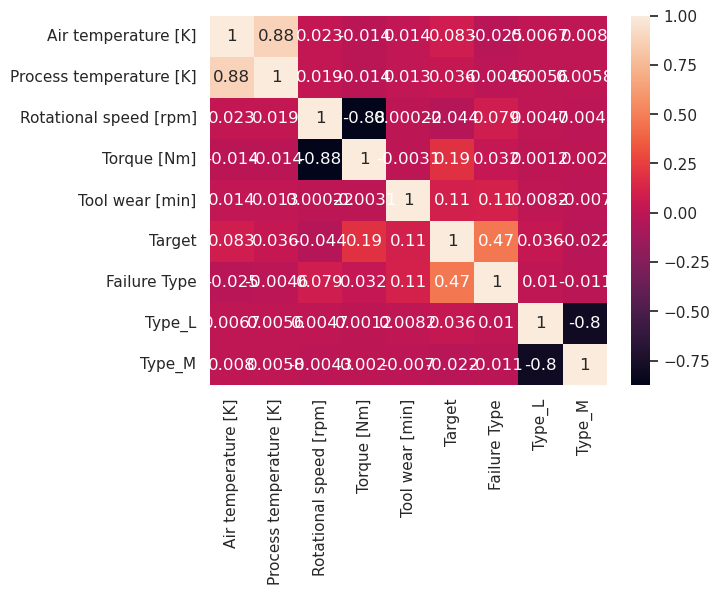

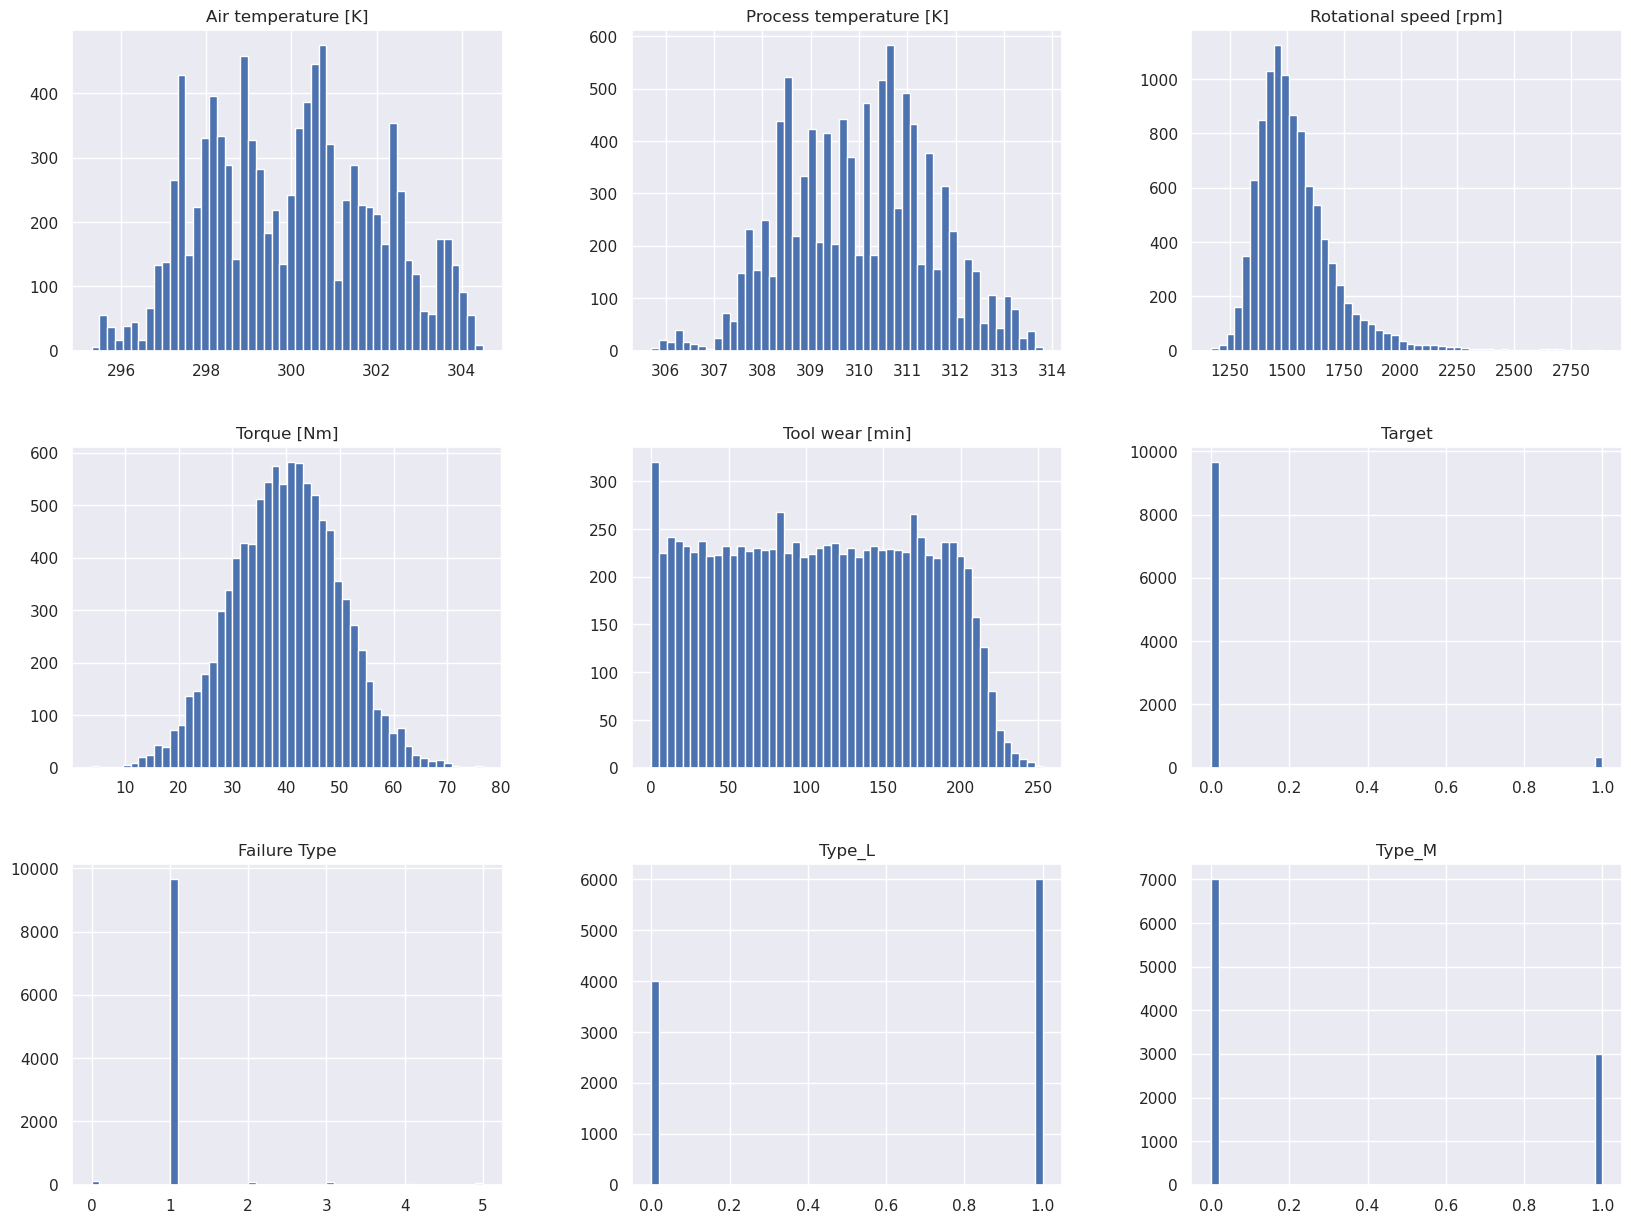

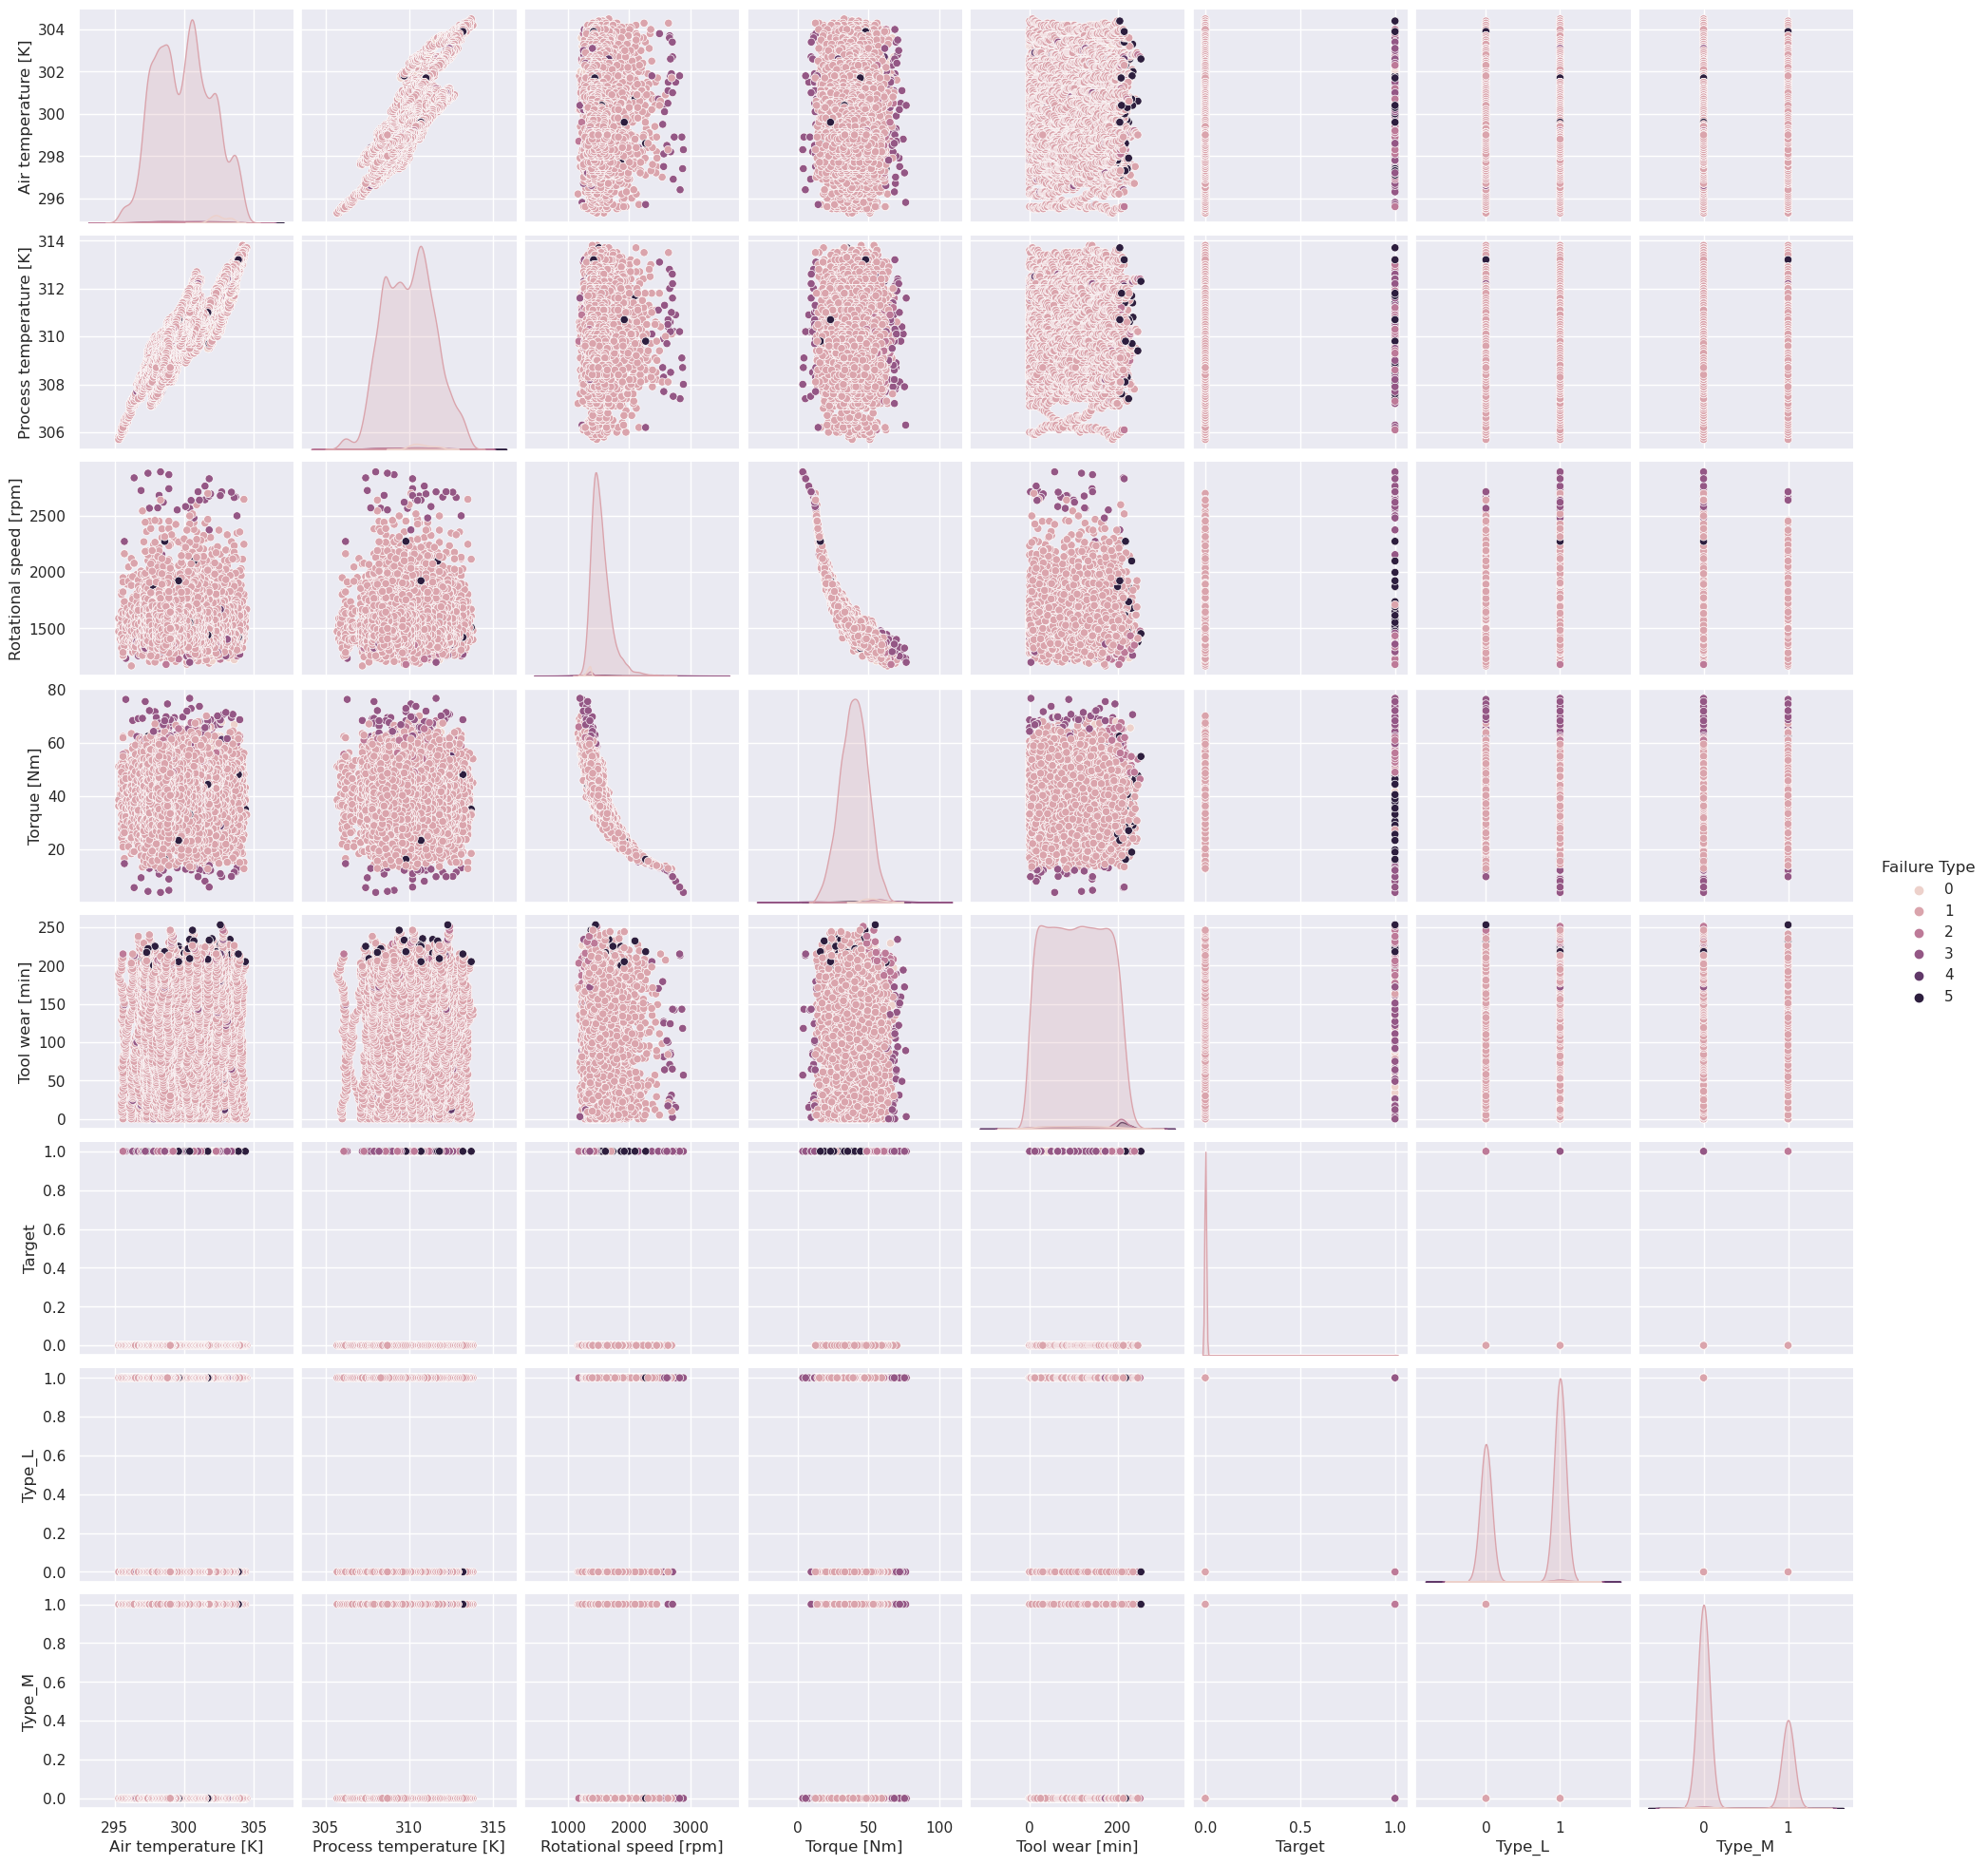

In [11]:
sns.heatmap(dataset.corr(),annot=True,) # матрица на корелација
dataset.hist(bins=50, figsize=(20,15)) # распределба на карактеристиките
sns.pairplot(dataset,hue='Failure Type') #меѓусебна зависност на карактеристиките

### 1.3. Опис на користените метрики <a id='met'></a>
  
 Погоре се прикажани визуелно податоците и нивните зависности. Најпрво е прикажана матрица на корелација. Од неа може да се заклучи дека параметри со голема корелација се 
 температурата на процесот и температурата на воздухот со корелација 0.88 и ротационата брзина и вртежниот момент со корелација -0.88 што значи дека се зависни      обратнопропорционално. Останатите податоци може да се заклучи дека се меѓусебно независни. Иако има два пара податоци што се меѓусебно зависно во овој случај нема да се изврши редукција на димензионалност или карактеристики бидејќи вкупниот број на карактеристики не е многу голем.
 Следно е прикажана дистрибуцијата на сите карактеристики. Може да се забележи дека вртежниот момент, ротационата брзина и донекаде температурата на воздухот и процесот се Гаусови распределби. За искористеноста на машините се гледа дека е рамномерно распространета а потоа опаѓа експоненцијално. На крај е поставена класата Target од каде се гледа дека бројот на аномалии е многу помал (<5%) за разлика од случаите без аномалии.
 На крај се прикажани визуелно зависностите меѓу сите карактеристики. На дијагоналата можат повторно да се видат распределбите на секоја карактеристика. Останатите се комбинации на различните карактеристики. Зависноста меѓу температурата на процесот и воздухот може да се апроксимира со права (линеарна зависност) со што се потврдува заклучокот од погоре дека имаат голема корелација. Друга карактеристична зависност е меѓу ротационата брзина и кружното забрзување, која може да се апроксимира со експоненцијално опаѓачка крива.
 На некои од графиците можат да се забележат и можните случаеви на аномалија кои се одалечени од останатите податоци (пример кај зависноста меѓу Tool wear и Torque).

## 2. Користени пристапи од машинско учење за решавање на проблемот <a id='pristapi'></a>

Користени се повеќе различни алгоритми за решавање на проблемот. Бидејќи има два излеза проблемот се раздвојува на два дела. Најпрво се користат алгоритми за пронаоѓање на аномалии, а потоа истите алгоритми се користат за пронаоѓање на типот на аномалија. Излезот “Failure Type“ се третира како мултикласна класификација. 

Пред да се тестираат алгоритмите најпрво се дели множеството на податоци за тренинг и за тест. За сите алгоритми важи истата поделба за подоцна да може да се спореди нивната успешност. Потоа се врши скалирање на податоците.Се покажа дека по скалирање на податоците мнозинството од алгоритмите даваат подобар резултат. 

Пристапите кои се користат е покажано дека се успешни за решавање и за проблеми со аномалии и за мултикласна класификација.

Поради небалансираноста во класите беа испробани техники за израмнување на класите. Најпрва е техниката oversampling каде се дуплираат рандом примероци од класата со помал број на примероци и се додаваат во тренинг множеството. Користењето на овој метод не се покажа успешно. Успешноста на алгоритмите или беше иста или некои случаеви малку полоша.
Следниот испробан метод е обратниот од oversampling, односно undersampling. Наместо дуплирање на примероците од помалата класа овде се земаат рандом примероци од поголемата класа и се бришат од тренинг множеството. Овој метод се покажа уште понеуспешен од претходниот; точноста на сите алгоритми се намали. Послеедниот користен метод е SMOTE техниката. Со SMOTE се синтезираат нови примероци од помалата класа врз основа на постоечките според методот на најблиски соседи. Ниту оваа технка не се покажа особено успешна.
Ја подобри точноста кај некои од алгоритмите но не многу значајно. Кодот за сите овие методи е поставен подолу во форма на коментар. Може да се испроба за да се видат разликите.

### 2.1. k-NN <a id='prist1'></a>

Првиот пристап е k-NN. Knn е едноставен но често користен алгоритам за класификација. Со Knn предикцијата дали се работи за аномалија се прави врз основа на к најблиските соседи. Хиперпараметарот кој треба да се нагоди е бројот на најблиски соседи. Во овој пример по пат на проба и grid search се воспостави дека најдобри резултати се добиваат ако се земат во предвид 5 најблиски соседи. Во вториот случај кога се работи се мултикласна класификација најдобри резултати се добиваат кога бројот на најблиски соседи е 3. Ова е очекувано бидејќи има 6 класи од кои 5 се аномалии и нема многу голем број на примероци во множеството податоци.

### 2.2. Logistic regression <a id='prist2'></a>

Втор пристап кој се користи е логистичка регресија. Логистичка регресија е едноставен и често користен алгоритам од машинско учење. Наменет е за бинарна класификација. Тоа се забележува и во резултатите. Има поголема точност кога треба да класифицира аномалии отколку кога треба да одреди за каков тип на аномалија се работи. Промената на параметрите од функцијата за логистичка регресија покажа дека е најдобро да се користат предодредените параметри.Единствено треба да се ограничи максималниот број на итерации.

### 2.2. SVM <a id='prist2'></a>

Уште еден често користен пристап е SVM. Овој алгоритам ги раздвојува примероците од различни класи во хиперрамнина. Затоа е многу погоден и во случајот за пронаоѓање аномалии и во мултикласната класификација. Хиперпараметри кои можат да се нагодуваат се kernel, gamma,degree и C. Има повеќе типови на кернели кои можат да се користат. За овој проблем се искористени rbf и poly. Другите параметри се нагодени според комбинација на проба и grid search.

### 2.2. Random Forest <a id='prist2'></a>

Random Forest е алгоритам e енсембл метод кој го комбинира излезот од повеќе дрва на одлучување за да стигне до еден резултат. Во овој алгоритам има повеќе хиперпараметри кој може да се нагодуваат: критериум за кој е избрано ентропија, максимална длабочина ,максимален број на карактеристики,min_samples_leaf, min_samples_split,број на естиматори и random_statе. За подобро нагодување се користи grid search.

### 2.n. Decision Tree <a id='pristn'></a>

Decision Tree креаира модел за класификација со градење на дрво. Секој јазол во тоа дрво означува некоја карактеристика а секоја гранка која излегува од тој јазол е можна вредност за истата карактеристика. Хиперпараметри кои треба да се нагодат се: критериум, splitter, максимална длабочина, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_features, random_state, max_leaf_nodes, min_impurity_decrease, class_weight и ccp_alpha.

## 3. Решавање на проблемот <a id='res'></a>

### 3.1. y='Target' <a id='res1'></a>


In [12]:
X = dataset.drop(columns=["Failure Type","Target"] , axis=1)
y = dataset["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_test1=y_test
X_test1=X_test

###  Oversampling <a id='resn'></a>

In [13]:
#oversample = RandomOverSampler(sampling_strategy='minority')
#X_over, y_over = oversample.fit_resample(X_train, y_train)
#print(Counter(y_over))
#X_train, y_train=X_over,y_over

###  Undersampling <a id='resn'></a>

In [14]:
#undersample = RandomUnderSampler(sampling_strategy='majority')
#X_under, y_under = undersample.fit_resample(X_train, y_train)
#print(Counter(y_under))
#X_train, y_train=X_under, y_under

###  SMOTE <a id='resn'></a>

In [15]:
#oversample = SMOTE()
#X_s, y_s = oversample.fit_resample(X_train, y_train)
#print(Counter(y_s))
#X_train, y_train= X_s, y_s


### 3.1.1 k-NN <a id='res1'></a>


In [16]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
knn_pred1=neigh.predict(X_test)

In [17]:
knn_accuracy1 = accuracy_score(y_test, knn_pred1)
knn_f11 = f1_score(y_test, knn_pred1, average='weighted')
print('Accuracy (Knn): ', "%.2f" % (knn_accuracy1*100))
print('F1 (Knn): ', "%.2f" % (knn_f11*100))

Accuracy (Knn):  97.15
F1 (Knn):  96.43


In [18]:
print(classification_report( y_test,knn_pred1,zero_division=1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3859
           1       0.80      0.26      0.39       141

    accuracy                           0.97      4000
   macro avg       0.89      0.63      0.69      4000
weighted avg       0.97      0.97      0.96      4000



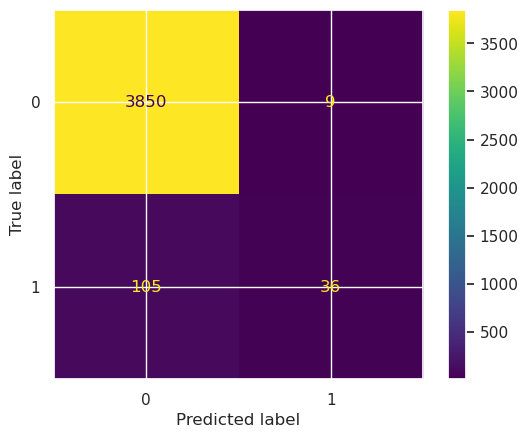

In [19]:
cmknn=confusion_matrix(y_test, knn_pred1)
cmknn_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cmknn)

cmknn_display.plot()
plt.show()

In [85]:
#k_range = list(range(1, 31))
#param_grid = dict(n_neighbors=k_range)
  
#grid = GridSearchCV(neigh, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

#grid_search=grid.fit(X_train, y_train)

In [86]:
#print(grid_search.best_params_)

### 3.1.2. Logisic Regression <a id='resn'></a>

In [22]:
digreg = linear_model.LogisticRegression(max_iter=10000)
digreg.fit(X_train, y_train)
lr_pred1 = digreg.predict(X_test)

In [23]:
lr_accuracy1 = accuracy_score(y_test, lr_pred1)
lr_f11 = f1_score(y_test, lr_pred1, average='weighted')
print('Accuracy (Logistic Regression): ', "%.2f" % (lr_accuracy1*100))
print('F1 (Logistic Regression): ', "%.2f" % (lr_f11*100))

Accuracy (Logistic Regression):  97.00
F1 (Logistic Regression):  96.06


In [24]:
print(classification_report(y_test,lr_pred1,zero_division=1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3859
           1       0.84      0.18      0.30       141

    accuracy                           0.97      4000
   macro avg       0.90      0.59      0.64      4000
weighted avg       0.97      0.97      0.96      4000



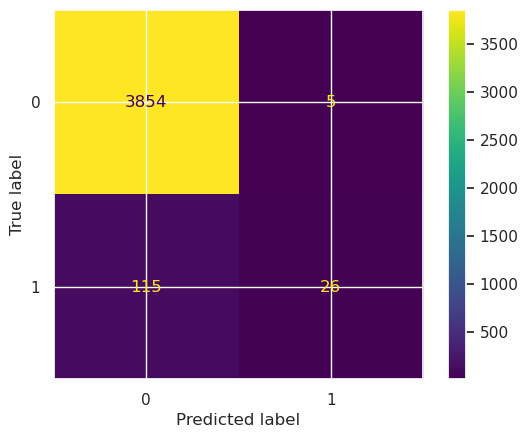

In [25]:
cmlr=confusion_matrix(y_test, lr_pred1)
cmlr_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cmlr)

cmlr_display.plot()
plt.show()

 ### 3.1.3. SVM <a id='resn'></a>

In [26]:
rbf = svm.SVC(kernel='rbf', gamma=0.1, C=100).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1000).fit(X_train, y_train)
poly_pred1 = poly.predict(X_test)
rbf_pred1 = rbf.predict(X_test)

In [27]:
poly_accuracy1 = accuracy_score(y_test, poly_pred1)
poly_f11 = f1_score(y_test, poly_pred1, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy1*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f11*100))

Accuracy (Polynomial Kernel):  97.80
F1 (Polynomial Kernel):  97.56


In [28]:
print(classification_report(y_test,poly_pred1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3859
           1       0.80      0.50      0.62       141

    accuracy                           0.98      4000
   macro avg       0.89      0.75      0.80      4000
weighted avg       0.98      0.98      0.98      4000



In [29]:
rbf_accuracy1 = accuracy_score(y_test, rbf_pred1)
rbf_f11 = f1_score(y_test, rbf_pred1, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy1*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f11*100))

Accuracy (RBF Kernel):  98.30
F1 (RBF Kernel):  98.16


In [30]:
print(classification_report(y_test,rbf_pred1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3859
           1       0.86      0.62      0.72       141

    accuracy                           0.98      4000
   macro avg       0.92      0.81      0.86      4000
weighted avg       0.98      0.98      0.98      4000



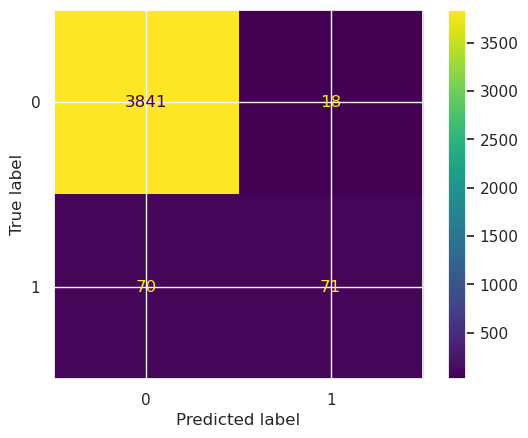

In [31]:
cmpoly=confusion_matrix(y_test, poly_pred1)
cmpoly_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cmpoly)

cmpoly_display.plot()
plt.show()

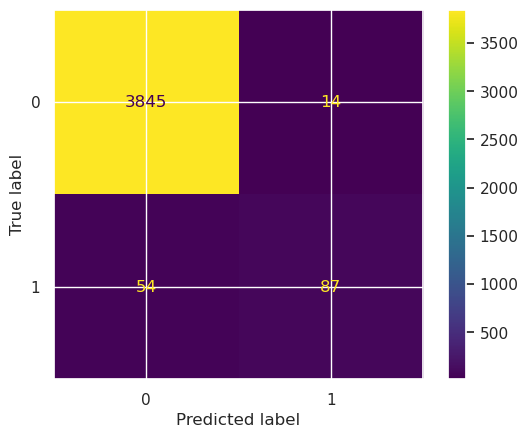

In [32]:
cmrbf=confusion_matrix(y_test, rbf_pred1)
cmrbf_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cmrbf)

cmrbf_display.plot()
plt.show()

In [33]:
#param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#              'kernel': ['rbf']} 
  
# grid_search = GridSearchCV(rbf, param_grid, refit = True, verbose = 3)
  
#grid_search.fit(X_train, y_train)

In [34]:
#print(grid_search.best_params_)
  
# print how our model looks after hyper-parameter tuning
#print(grid_search.best_estimator_)

In [35]:
#param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#              'kernel': ['poly']} 
#  
#grid_search = GridSearchCV(poly, param_grid, refit = True, verbose = 3)
  
#grid_search.fit(X_train, y_train)

In [36]:
#print(grid_search.best_params_)
  
# print how our model looks after hyper-parameter tuning
#print(grid_search.best_estimator_)

### 3.1.4. Random forest <a id='resn'></a>

In [37]:
rf = RandomForestClassifier(criterion='entropy', max_depth=80, max_features=3,
                       min_samples_leaf=3, min_samples_split=10,
                       n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)
rf_pred1 = rf.predict(X_test)

In [38]:
rf_accuracy1 = accuracy_score(y_test, rf_pred1)
rf_f11 = f1_score(y_test, rf_pred1, average='weighted')
print('Accuracy (Random Forest): ', "%.2f" % (rf_accuracy1*100))
print('F1 (Random Forest): ', "%.2f" % (rf_f11*100))

Accuracy (Random Forest):  98.42
F1 (Random Forest):  98.26


In [39]:
print(classification_report(y_test,rf_pred1,zero_division=1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3859
           1       0.92      0.60      0.73       141

    accuracy                           0.98      4000
   macro avg       0.95      0.80      0.86      4000
weighted avg       0.98      0.98      0.98      4000



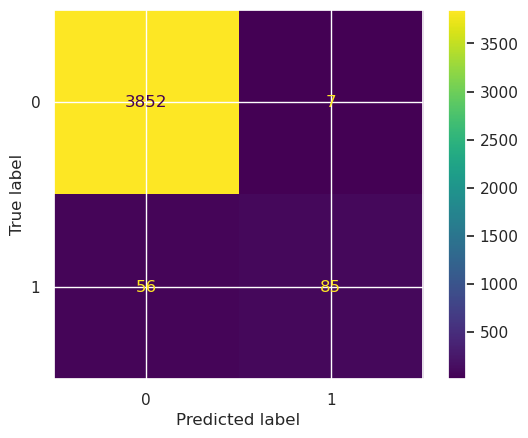

In [40]:
cmrf=confusion_matrix(y_test, rf_pred1)
cmrf_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cmrf)

cmrf_display.plot()
plt.show()

In [41]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [42]:
#grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
#                          cv = 3, n_jobs = -1, verbose = 2)
#grid_search.fit(X_train, y_train)

In [43]:
#print(grid_search.best_params_)
#print(grid_search.best_estimator_)

### 3.1.5. Decision Tree <a id='resn'></a>

In [44]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred1=dt.predict(X_test)

In [45]:
dt_accuracy1 = accuracy_score(y_test, dt_pred1)
dt_f11 = f1_score(y_test, dt_pred1, average='weighted')
print('Accuracy (Decision Tree): ', "%.2f" % (dt_accuracy1*100))
print('F1 (Decision Tree): ', "%.2f" % (dt_f11*100))

Accuracy (Decision Tree):  97.67
F1 (Decision Tree):  97.65


In [46]:
print(classification_report(y_test,dt_pred1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3859
           1       0.68      0.65      0.66       141

    accuracy                           0.98      4000
   macro avg       0.83      0.82      0.82      4000
weighted avg       0.98      0.98      0.98      4000



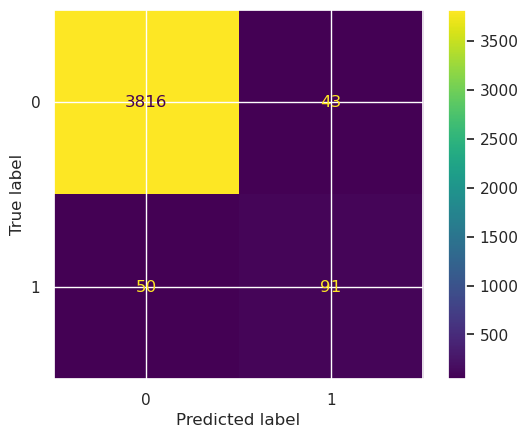

In [47]:
cmdt=confusion_matrix(y_test, dt_pred1)
cmdt_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cmdt)

cmdt_display.plot()
plt.show()

In [48]:
#param_grid =  {
#    'min_samples_leaf': [1, 2, 3],
#    'max_depth': [1, 2, 3],
#}

In [49]:
#grid_search = GridSearchCV(estimator=dt,
#                    param_grid=param_grid,
#                    cv=10,
#                    n_jobs=1,
#                    verbose=2)

#grid_search.fit(X_train, y_train)

In [50]:
#print(grid_search.best_params_)
#print(grid_search.best_estimator_)

### 3.2. y='failure Type' <a id='res1'></a>


In [51]:
X = dataset.drop(columns=["Failure Type","Target"] , axis=1)
y = dataset["Failure Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_test2=y_test
X_test2=X_test

###  Oversampling <a id='resn'></a>

In [52]:
#oversample = RandomOverSampler(sampling_strategy='minority')
#X_over, y_over = oversample.fit_resample(X_train, y_train)
#print(Counter(y_over))
#X_train, y_train=X_over,y_over

###  Undersampling <a id='resn'></a>

In [53]:
#undersample = RandomUnderSampler(sampling_strategy='majority')
#X_under, y_under = undersample.fit_resample(X_train, y_train)
#print(Counter(y_under))
#X_train, y_train=X_under, y_under

###  SMOTE <a id='resn'></a>

In [54]:
#oversample = SMOTE(k_neighbors=4)
#X_s, y_s = oversample.fit_resample(X_train, y_train)
#print(Counter(y_s))
#X_train, y_train= X_s, y_s


### 3.2.1 k-NN <a id='res1'></a>


In [55]:
neigh2 = KNeighborsClassifier(n_neighbors=3)
neigh2.fit(X_train, y_train)
knn_pred2=neigh2.predict(X_test)

In [56]:
knn_accuracy2 = accuracy_score(y_test, knn_pred2)
knn_f12 = f1_score(y_test, knn_pred2, average='weighted')
print('Accuracy (Knn): ', "%.2f" % (knn_accuracy2*100))
print('F1 (Knn): ', "%.2f" % (knn_f12*100))

Accuracy (Knn):  97.00
F1 (Knn):  96.24


In [57]:
print(classification_report(y_test,knn_pred2,zero_division=1))

              precision    recall  f1-score   support

           0       0.62      0.33      0.43        46
           1       0.97      1.00      0.99      3849
           2       0.73      0.46      0.56        35
           3       0.80      0.29      0.43        41
           4       1.00      0.00      0.00        13
           5       1.00      0.00      0.00        16

    accuracy                           0.97      4000
   macro avg       0.85      0.35      0.40      4000
weighted avg       0.97      0.97      0.96      4000



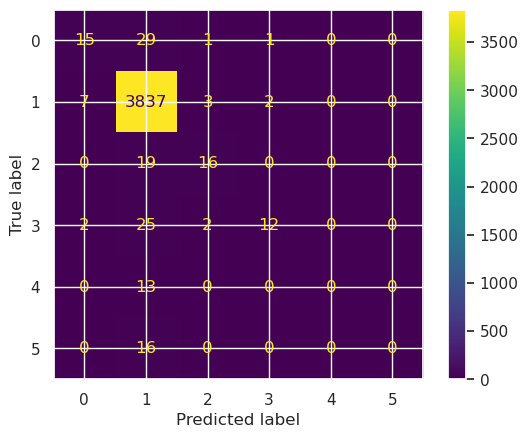

In [58]:
cmknn=confusion_matrix(y_test, knn_pred2)
cmknn_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cmknn)

cmknn_display.plot()
plt.show()

In [87]:
#k_range = list(range(1, 31))
#param_grid = dict(n_neighbors=k_range)
  
#grid = GridSearchCV(neigh2, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)

#grid_search=grid.fit(X_train, y_train)

In [88]:
#print(grid_search.best_params_)

### 3.2.2. Logisic Regression <a id='resn'></a>

In [61]:
digreg2 = linear_model.LogisticRegression(tol=1e-12, C=0.45e-2, fit_intercept=True, max_iter=10000)
digreg2.fit(X_train, y_train)
lr_pred2 = digreg2.predict(X_test)

In [62]:
lr_accuracy2 = accuracy_score(y_test, lr_pred2)
lr_f12 = f1_score(y_test, lr_pred2, average='weighted')
print('Accuracy (Logistic Regression): ', "%.2f" % (lr_accuracy2*100))
print('F1 (Logistic Regression): ', "%.2f" % (lr_f12*100))

Accuracy (Logistic Regression):  96.23
F1 (Logistic Regression):  94.37


In [63]:
print(classification_report(y_test,lr_pred2,zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00        46
           1       0.96      1.00      0.98      3849
           2       1.00      0.00      0.00        35
           3       1.00      0.00      0.00        41
           4       1.00      0.00      0.00        13
           5       1.00      0.00      0.00        16

    accuracy                           0.96      4000
   macro avg       0.99      0.17      0.16      4000
weighted avg       0.96      0.96      0.94      4000



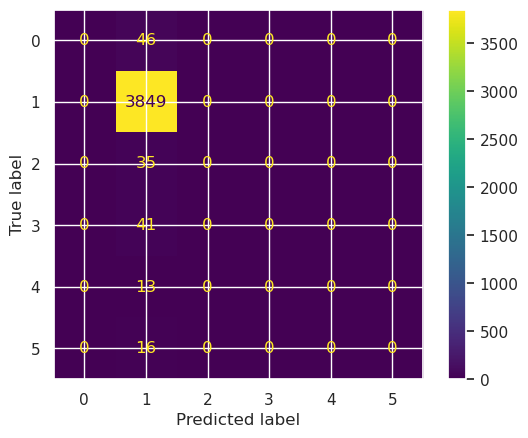

In [64]:
cmlr=confusion_matrix(y_test, lr_pred2)
cmlr_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cmlr)

cmlr_display.plot()
plt.show()

 ### 3.2.3. SVM <a id='resn'></a>

In [65]:
rbf2 = svm.SVC(kernel='rbf', gamma=0.5, C=100).fit(X_train, y_train)
poly2 = svm.SVC(kernel='poly', degree=3, C=1000).fit(X_train, y_train)
poly_pred2 = poly2.predict(X_test)
rbf_pred2 = rbf2.predict(X_test)

In [66]:
poly_accuracy2 = accuracy_score(y_test, poly_pred2)
poly_f12 = f1_score(y_test, poly_pred2, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy2*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f12*100))

Accuracy (Polynomial Kernel):  97.88
F1 (Polynomial Kernel):  97.63


In [67]:
print(classification_report(y_test,poly_pred2,zero_division=1))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74        46
           1       0.99      0.99      0.99      3849
           2       0.94      0.91      0.93        35
           3       0.78      0.68      0.73        41
           4       1.00      0.00      0.00        13
           5       0.11      0.06      0.08        16

    accuracy                           0.98      4000
   macro avg       0.75      0.57      0.58      4000
weighted avg       0.98      0.98      0.98      4000



In [68]:
rbf_accuracy2 = accuracy_score(y_test, rbf_pred2)
rbf_f12 = f1_score(y_test, rbf_pred2, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy2*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f12*100))

Accuracy (RBF Kernel):  97.58
F1 (RBF Kernel):  97.37


In [69]:
print(classification_report(y_test,rbf_pred2,zero_division=1))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77        46
           1       0.99      0.99      0.99      3849
           2       0.77      0.77      0.77        35
           3       0.77      0.59      0.67        41
           4       0.00      0.00      0.00        13
           5       0.17      0.12      0.14        16

    accuracy                           0.98      4000
   macro avg       0.57      0.54      0.56      4000
weighted avg       0.97      0.98      0.97      4000



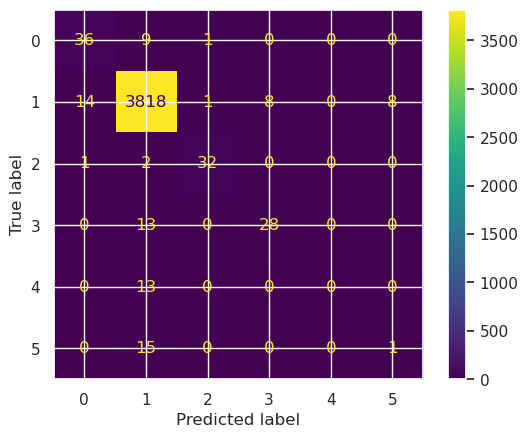

In [70]:
cmpoly=confusion_matrix(y_test, poly_pred2)
cmpoly_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cmpoly)

cmpoly_display.plot()
plt.show()

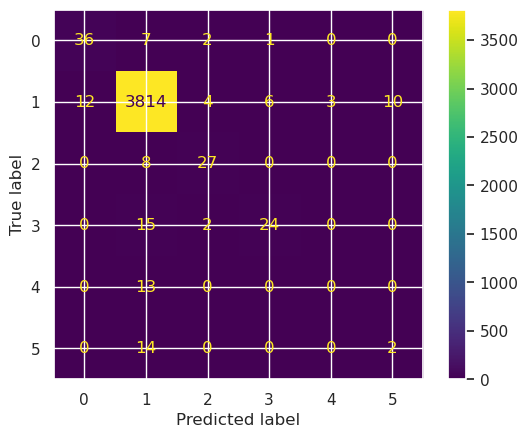

In [71]:
cmrbf=confusion_matrix(y_test, rbf_pred2)
cmrbf_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cmrbf)

cmrbf_display.plot()
plt.show()

### 3.2.4. Random forest <a id='resn'></a>

In [72]:
rf2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
rf2.fit(X_train, y_train)
rf_pred2 = rf2.predict(X_test)

In [73]:
rf_accuracy2 = accuracy_score(y_test, rf_pred2)
rf_f12 = f1_score(y_test, rf_pred2, average='weighted')
print('Accuracy (Random Forest): ', "%.2f" % (rf_accuracy2*100))
print('F1 (Random Forest): ', "%.2f" % (rf_f12*100))

Accuracy (Random Forest):  97.40
F1 (Random Forest):  96.72


In [74]:
print(classification_report(y_test,rf_pred2,zero_division=1))

              precision    recall  f1-score   support

           0       0.90      0.61      0.73        46
           1       0.98      1.00      0.99      3849
           2       0.70      0.20      0.31        35
           3       0.80      0.49      0.61        41
           4       1.00      0.00      0.00        13
           5       0.00      0.00      0.00        16

    accuracy                           0.97      4000
   macro avg       0.73      0.38      0.44      4000
weighted avg       0.97      0.97      0.97      4000



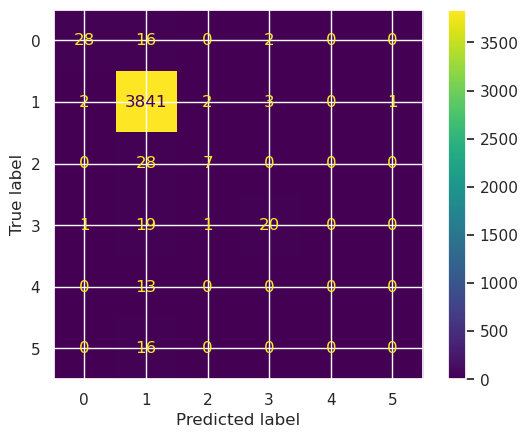

In [75]:
cmrf=confusion_matrix(y_test, rf_pred2)
cmrf_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cmrf)

cmrf_display.plot()
plt.show()

### 3.2.5. Decision Tree <a id='resn'></a>

In [76]:
dt2 = DecisionTreeClassifier()
dt2.fit(X_train,y_train)
dt_pred2=dt2.predict(X_test)

In [77]:
dt_accuracy2 = accuracy_score(y_test, dt_pred2)
dt_f12 = f1_score(y_test, dt_pred2, average='weighted')
print('Accuracy (Decision Tree): ', "%.2f" % (dt_accuracy2*100))
print('F1 (Decision Tree): ', "%.2f" % (dt_f12*100))

Accuracy (Decision Tree):  97.50
F1 (Decision Tree):  97.48


In [78]:
print(classification_report(y_test,dt_pred2,zero_division=1))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        46
           1       0.99      0.99      0.99      3849
           2       0.59      0.63      0.61        35
           3       0.89      0.76      0.82        41
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        16

    accuracy                           0.97      4000
   macro avg       0.56      0.54      0.55      4000
weighted avg       0.97      0.97      0.97      4000



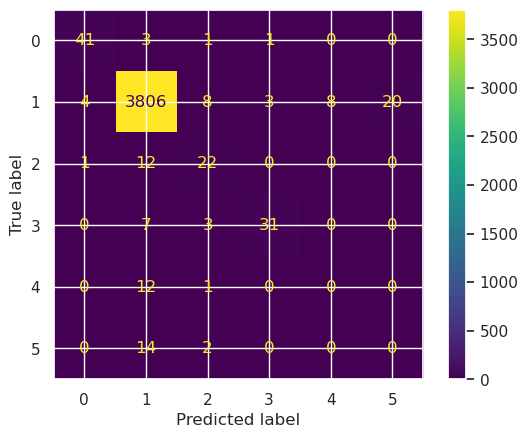

In [79]:
cmdt=confusion_matrix(y_test, dt_pred2)
cmdt_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cmdt)

cmdt_display.plot()
plt.show()

## 4. Споредба на резултатите <a id='spor'></a>

За да се види успешноста на алгоритмите после секој алгоритам беа прикажани следните мерки: аccuracy, F1, precision, recall и матрица на конфузија. Како што може да се забележи во случајот за барање на аномалии најуспешен алгоритам е Random forest , а блиску до него е SVM-RBF Kernel. Најлош резултат даде логистичка регресија. Во вториот дел каде што се работи со мултикласна класификација најдобар резултат има SVM-Polynomial Kernel и блиску до него Decision Tree,а најлош повторно логистичка регресија. Оваа споредба е графички прикажана подолу, а потоа се дадени и ROC кривите за y=Target кои ги потврдуваат претходно добиените резултати. 

Text(0.5, 1.0, 'Accuracy Comparison 1')

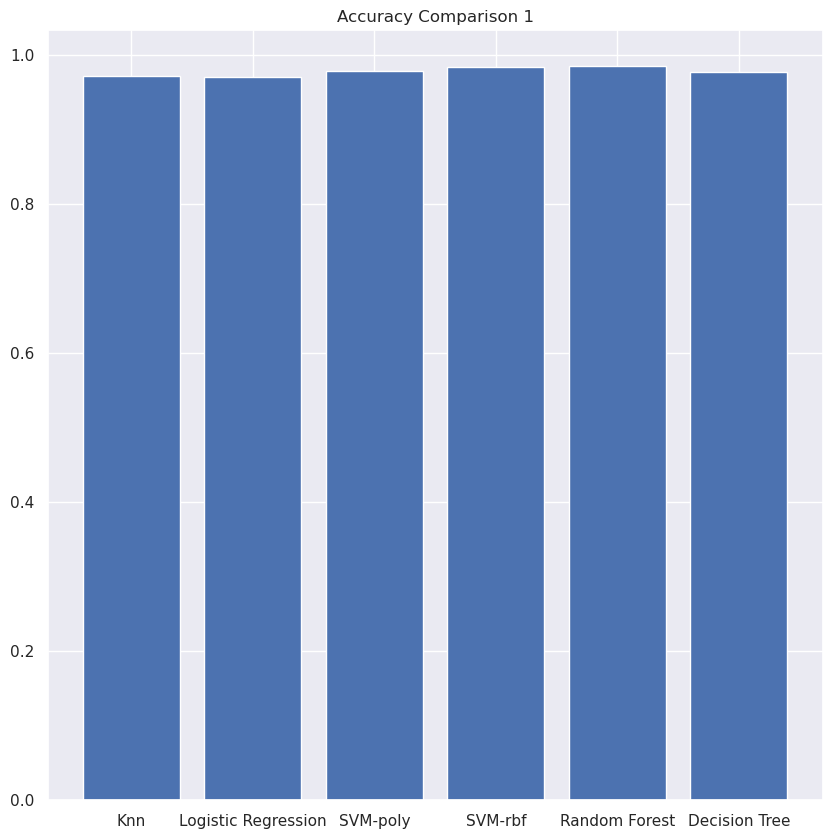

In [80]:
plt.figure(figsize=(10, 10))
models = ['Knn','Logistic Regression', 'SVM-poly','SVM-rbf', 'Random Forest','Decision Tree']
accuracies = [knn_accuracy1, lr_accuracy1,poly_accuracy1,rbf_accuracy1,rf_accuracy1,dt_accuracy1]
plt.bar(models, accuracies)
plt.title("Accuracy Comparison 1")

Text(0.5, 1.0, 'Accuracy Comparison 2')

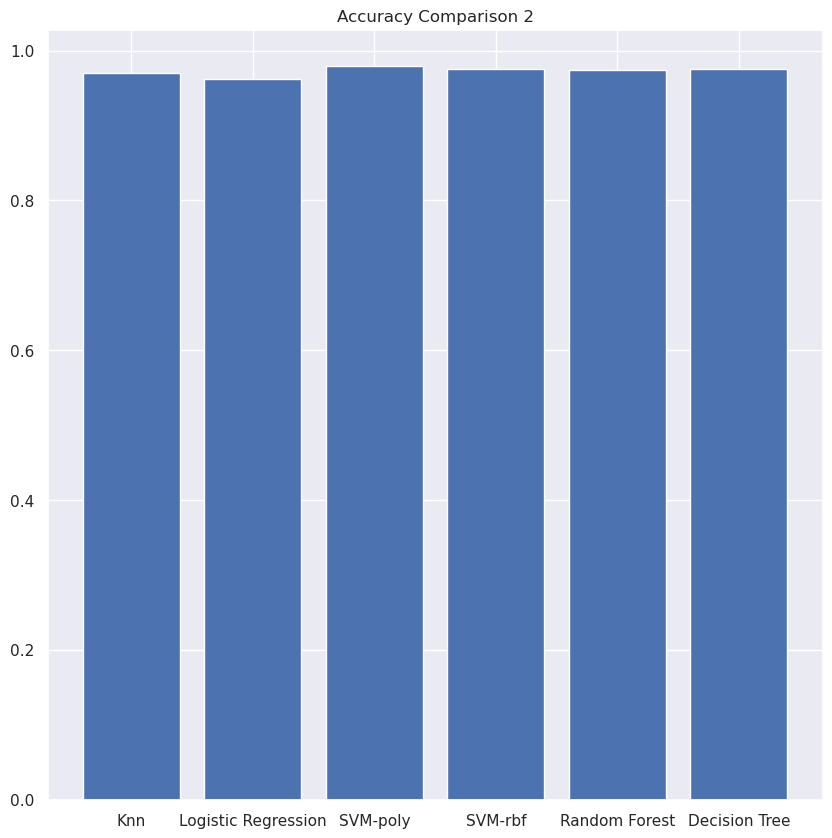

In [81]:
plt.figure(figsize=(10, 10))
models = ['Knn','Logistic Regression', 'SVM-poly','SVM-rbf', 'Random Forest','Decision Tree']
accuracies = [knn_accuracy2, lr_accuracy2,poly_accuracy2,rbf_accuracy2,rf_accuracy2,dt_accuracy2]
plt.bar(models, accuracies)
plt.title("Accuracy Comparison 2")

Text(0.5, 1.0, 'F1 Comparison 1')

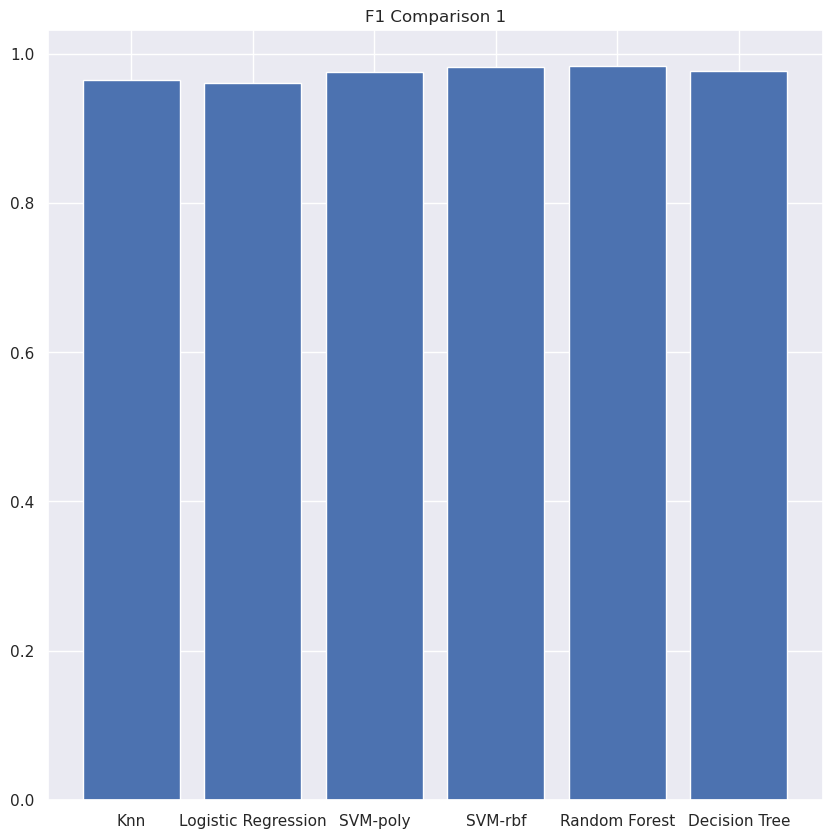

In [82]:
plt.figure(figsize=(10, 10))
models = ['Knn','Logistic Regression', 'SVM-poly','SVM-rbf', 'Random Forest','Decision Tree']
f1 = [knn_f11, lr_f11,poly_f11,rbf_f11,rf_f11,dt_f11]
plt.bar(models, f1)
plt.title("F1 Comparison 1")

Text(0.5, 1.0, 'F1 Comparison 2')

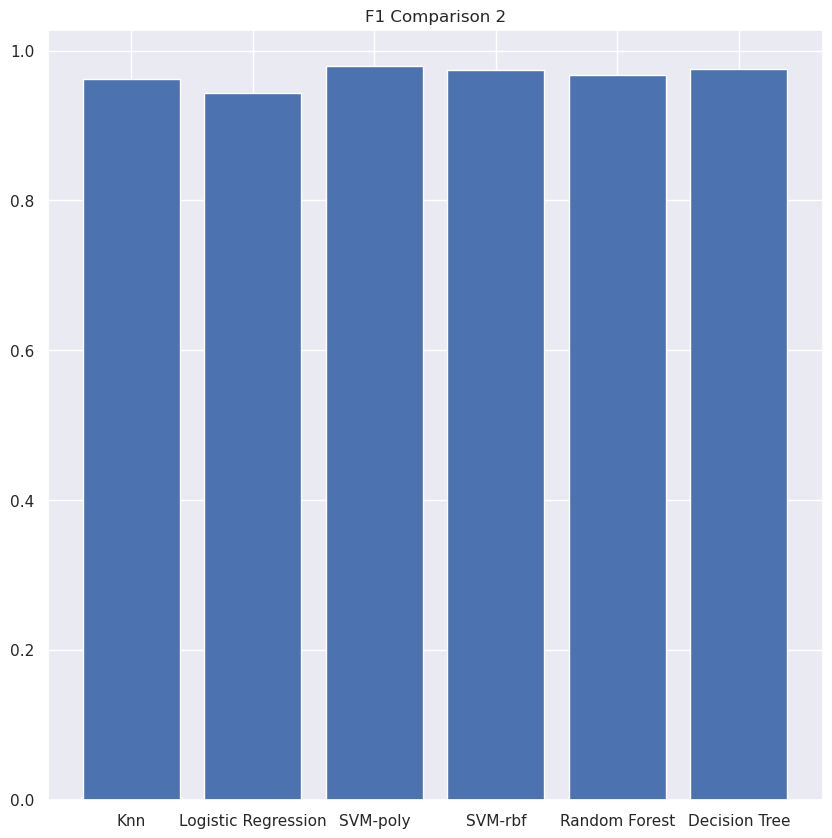

In [83]:
plt.figure(figsize=(10, 10))
models = ['Knn','Logistic Regression', 'SVM-poly','SVM-rbf', 'Random Forest','Decision Tree']
f1 = [knn_f12, lr_f12,poly_accuracy2,rbf_f12,rf_f12,dt_f12]
plt.bar(models, f1)
plt.title("F1 Comparison 2")

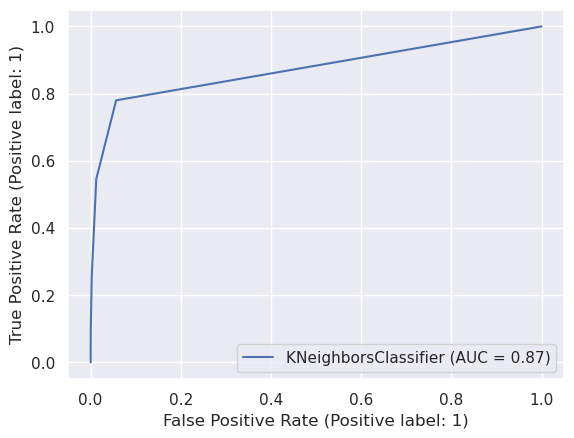

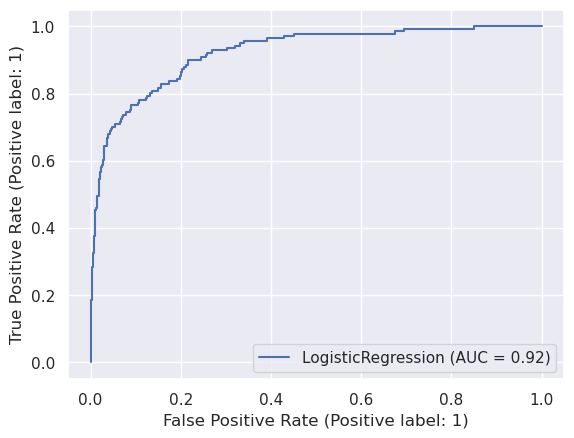

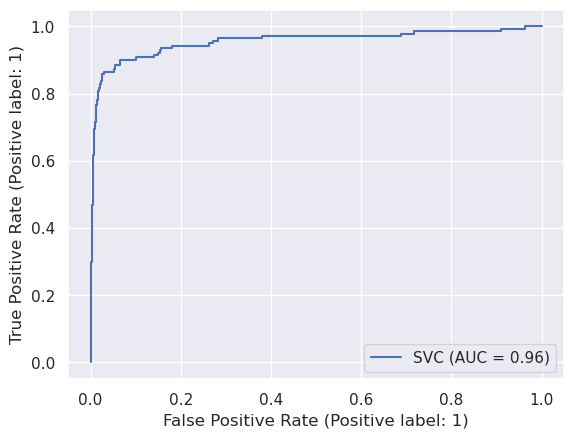

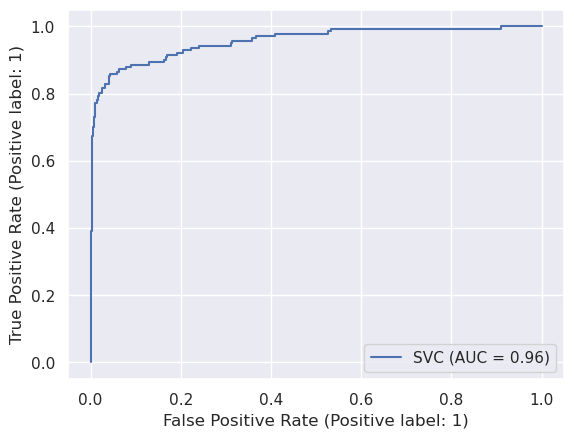

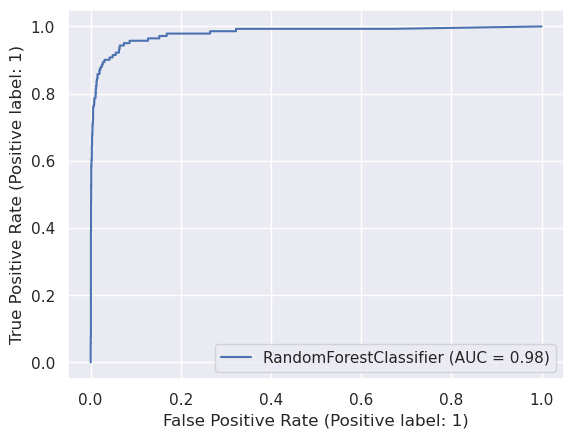

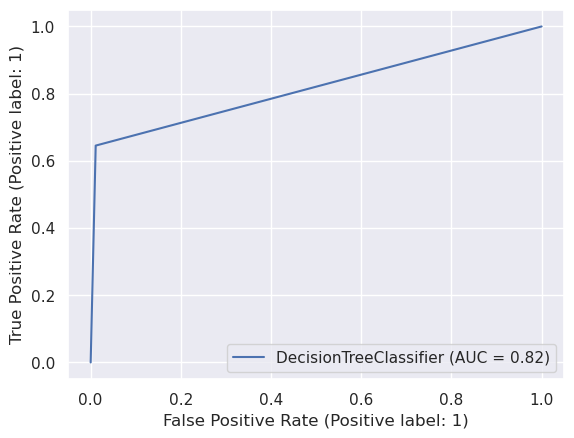

In [84]:
models = [neigh,digreg,poly,rbf,rf,dt]
for model in models:
    RocCurveDisplay.from_estimator(model, X_test1, y_test1)
    plt.show()

## 5. Пост-оптимизирачка анализа <a id='postop'></a>

Добиените резултати се задоволувачки и може да се каже дека пристапите беа издржани, со исклучок на логистичка регресија која даде лоши резултати во двата случаеви.
Иако логистичката регресија даде незадоволителни резултати може да се пробаат одредени нагодувања на хиперпараметрите со цел да се подобрат резултатите или да се проба сосема нов пристап кој не е искористен во оваа анализа. Може да се пробаат и други трансформации на податоците како методи за балансирање на небалансирана класа или претворање на податоците во други мерни величини и потоа повторно да се испробаат истите алгоритми.


## 6. Заклучок <a id='zakl'></a>

Поради тоа што се работи со пронаоѓање на аномалии, иако некои од конечните резултати се многу добри (Random Forest со точност над 98% или SVM) во пракса е пожелно резултатите да се со поголема точност. Во зависност од индустрискиот процес и видот на аномалија може да се предизвика голема штета доколку некоја аномалија не е детектирана. Затоа е многу важен и бројот на недетектирани аномалии. Секако со подобар хардвер има и можност за користење на повеќе методи. Може да се испроба grid search со повеќе параметри на сите од алгоритмите или да се изврши крос валидација со цел да се добие уште поголема точност.


## 7. Користена литература и ресурси <a class="anchor" id="resources"></a>

1. https://www.javatpoint.com/data-preprocessing-machine-learning
2. https://www.v7labs.com/blog/data-preprocessing-guide
3. https://likegeeks.com/python-correlation-matrix/
4. https://www.intellspot.com/anomaly-detection-algorithms/
5. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
6. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
7. https://www.tutorialspoint.com/machine_learning_with_python/classification_algorithms_logistic_regression.htm
8. https://www.baeldung.com/cs/svm-multiclass-classification
9. https://www.codementor.io/@agarrahul01/multiclass-classification-using-random-forest-on-scikit-learn-library-hkk4lwawu
10. https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/
11. https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
12. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV